# Read image and cut into 100 px x 100 px patches

In [1]:
import cv2

In [2]:
img = cv2.imread("shadow_remove.jpg")
img

array([[[ 18,  56,  50],
        [  4,  42,  36],
        [  0,  32,  25],
        ...,
        [ 67, 182, 163],
        [ 34, 150, 143],
        [  8, 127, 126]],

       [[ 56, 100,  93],
        [ 42,  87,  78],
        [ 32,  73,  65],
        ...,
        [ 83, 185, 167],
        [ 53, 156, 149],
        [ 26, 128, 127]],

       [[ 49, 109,  98],
        [ 42, 100,  89],
        [ 39,  92,  82],
        ...,
        [106, 186, 169],
        [ 71, 145, 139],
        [ 27,  99,  99]],

       ...,

       [[156, 233, 205],
        [ 86, 171, 139],
        [ 70, 165, 131],
        ...,
        [ 35,  91,  68],
        [ 43, 100,  75],
        [ 51, 108,  83]],

       [[129, 216, 188],
        [ 78, 169, 136],
        [ 72, 167, 130],
        ...,
        [ 46,  97,  77],
        [ 38,  99,  73],
        [ 33, 100,  71]],

       [[ 30, 122,  93],
        [ 48, 142, 108],
        [ 67, 160, 121],
        ...,
        [ 48,  96,  78],
        [ 17,  82,  56],
        [  0,  72,  42]]

In [3]:
img.shape

(20000, 20000, 3)

In [4]:
# Display image
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### One way to get patches, doesn't preserve order

In [20]:
from sklearn.feature_extraction import image

In [14]:
patches = image.extract_patches_2d(img, (100, 100), max_patches= 40000) #img is too large

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


In [21]:
?image.extract_patches_2d

In [15]:
type(patches)

numpy.ndarray

In [16]:
patches.shape

(40000, 100, 100, 3)

In [94]:
img[0:100, 0:100]

array([[[ 18,  56,  50],
        [  4,  42,  36],
        [  0,  32,  25],
        ...,
        [  0,  40,  33],
        [  0,  37,  27],
        [ 16,  72,  61]],

       [[ 56, 100,  93],
        [ 42,  87,  78],
        [ 32,  73,  65],
        ...,
        [  4,  46,  39],
        [  0,  45,  36],
        [ 25,  77,  67]],

       [[ 49, 109,  98],
        [ 42, 100,  89],
        [ 39,  92,  82],
        ...,
        [ 15,  51,  45],
        [ 12,  53,  45],
        [ 34,  80,  67]],

       ...,

       [[ 30,  69,  53],
        [ 27,  63,  47],
        [ 29,  56,  40],
        ...,
        [  6,  62,  51],
        [ 12,  81,  66],
        [ 10,  79,  66]],

       [[ 40,  70,  51],
        [ 33,  61,  42],
        [ 39,  59,  40],
        ...,
        [ 13,  72,  58],
        [ 21,  86,  71],
        [ 18,  80,  68]],

       [[ 47,  76,  60],
        [ 33,  56,  41],
        [ 30,  43,  27],
        ...,
        [ 30,  92,  80],
        [ 38,  98,  87],
        [ 38,  94,  83]]

### Alternatively, get patches by matrix slicing, preserves order

In [22]:
from itertools import product
patches = [img[i*100:(i+1)*100,j*100:(j+1)*100] for i, j in product(range(int(img.shape[0]/100)), range(int(img.shape[1]/100)))]

In [23]:
len(patches)

40000

In [25]:
patches.

AttributeError: 'list' object has no attribute 'shape'

In [36]:
patches[0]

array([[[ 18,  56,  50],
        [  4,  42,  36],
        [  0,  32,  25],
        ...,
        [  0,  40,  33],
        [  0,  37,  27],
        [ 16,  72,  61]],

       [[ 56, 100,  93],
        [ 42,  87,  78],
        [ 32,  73,  65],
        ...,
        [  4,  46,  39],
        [  0,  45,  36],
        [ 25,  77,  67]],

       [[ 49, 109,  98],
        [ 42, 100,  89],
        [ 39,  92,  82],
        ...,
        [ 15,  51,  45],
        [ 12,  53,  45],
        [ 34,  80,  67]],

       ...,

       [[ 30,  69,  53],
        [ 27,  63,  47],
        [ 29,  56,  40],
        ...,
        [  6,  62,  51],
        [ 12,  81,  66],
        [ 10,  79,  66]],

       [[ 40,  70,  51],
        [ 33,  61,  42],
        [ 39,  59,  40],
        ...,
        [ 13,  72,  58],
        [ 21,  86,  71],
        [ 18,  80,  68]],

       [[ 47,  76,  60],
        [ 33,  56,  41],
        [ 30,  43,  27],
        ...,
        [ 30,  92,  80],
        [ 38,  98,  87],
        [ 38,  94,  83]]

In [8]:
import numpy as np

In [26]:
patches = np.asarray(patches)

In [27]:
patches.shape

(40000, 100, 100, 3)

### need to resize patches to feed into pretrained deep network

In [28]:
patches.resize(40000, 224, 224, 3)

In [29]:
patches.shape

(40000, 224, 224, 3)

#### other, just to test

In [ ]:
# just to test
i=0
for patch in patches:
    cv2.imshow('patch' + str(i), patch)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    i += 1

# Feed patches into pretrained various deep networks

In [30]:
import keras
from keras.applications import vgg19, vgg16, inception_v3, resnet50

#Load the VGG19 model
vgg19_model = vgg19.VGG19(weights='imagenet')#include_top=True, weights='imagenet')#, input_shape=(100, 100, 3))

#Load the VGG16 model
vgg16_model = vgg16.VGG16(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))

In [33]:
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [15]:
vgg19_model.layers

In [17]:
vgg19_model.layers[-2]

## VGG19

In [45]:
# prepare the image for the VGG19 model
processed_image = vgg19.preprocess_input(patches)

# get the predicted probabilities for each class
predictions = vgg19_model.predict(processed_image)

In [46]:
processed_image.shape

(40000, 224, 224, 3)

In [47]:
predictions.shape

(40000, 1000)

In [48]:
label = vgg19.decode_predictions(predictions)
label

40960/35363 [==================================] - 0s 0us/step


[[('n09332890', 'lakeside', 0.105534226),
  ('n09421951', 'sandbar', 0.06628408),
  ('n04525038', 'velvet', 0.038020227),
  ('n04273569', 'speedboat', 0.032663964),
  ('n04347754', 'submarine', 0.027295368)],
 [('n09421951', 'sandbar', 0.10911052),
  ('n03223299', 'doormat', 0.08192612),
  ('n04589890', 'window_screen', 0.081619956),
  ('n04273569', 'speedboat', 0.040439367),
  ('n09332890', 'lakeside', 0.031628788)],
 [('n04589890', 'window_screen', 0.061500967),
  ('n09332890', 'lakeside', 0.053822577),
  ('n03223299', 'doormat', 0.048661314),
  ('n09421951', 'sandbar', 0.048549905),
  ('n04507155', 'umbrella', 0.039203648)],
 [('n09332890', 'lakeside', 0.09539483),
  ('n04273569', 'speedboat', 0.085497096),
  ('n09421951', 'sandbar', 0.06394555),
  ('n02009912', 'American_egret', 0.03710578),
  ('n02807133', 'bathing_cap', 0.027485592)],
 [('n04273569', 'speedboat', 0.13928036),
  ('n09332890', 'lakeside', 0.10110636),
  ('n09421951', 'sandbar', 0.09864247),
  ('n04347754', 'submari

#### something else, an alternative

In [49]:
vgg19_feature_list = []
for patch in patches:
    #img_data = image.img_to_array(img)
    img_data = np.expand_dims(patch, axis=0)
    img_data = vgg19.preprocess_input(img_data)

    vgg19_feature = vgg19_model.predict(img_data)
    vgg19_feature_np = np.array(vgg19_feature)
    vgg19_feature_list.append(vgg19_feature_np.flatten())

KeyboardInterrupt: 

In [ ]:
vgg19_feature_list_np = np.array(vgg19_feature_list)

In [ ]:
vgg19_feature_list_np

In [ ]:
vgg19_feature_list_np.shape

## VGG16

In [18]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(patches)

# get the predicted probabilities for each class
predictions = vgg16_model.predict(processed_image)
# print predictions
 
# # convert the probabilities to class labels
# # We will get top 5 predictions which is the default
# label = decode_predictions(predictions)
# print(label)

In [19]:
predictions

array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 6.9336867e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 3.2704046e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 1.9128976e+00, ...,
          0.0000000e+00, 3.8228567e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
        

In [20]:
predictions.shape

(2000, 3, 3, 512)

In [21]:
predictions[0].shape

(3, 3, 512)

In [22]:
vgg16_feature_list = []
for patch in patches:
    #img_data = image.img_to_array(img)
    img_data = np.expand_dims(patch, axis=0)
    img_data = vgg16.preprocess_input(img_data)

    vgg16_feature = vgg16_model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

In [23]:
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [24]:
vgg16_feature_list_np

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  1.775732,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
        10.688304],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [25]:
vgg16_feature_list_np.shape

(2000, 4608)

# Clustering

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## KMeans VGG16

In [33]:
kmeans = KMeans(n_clusters=3)

In [34]:
kmeans.fit(vgg16_feature_list_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
y_kmeans = kmeans.predict(vgg16_feature_list_np)

In [49]:
vgg16_feature_list_np.shape

(2000, 4608)

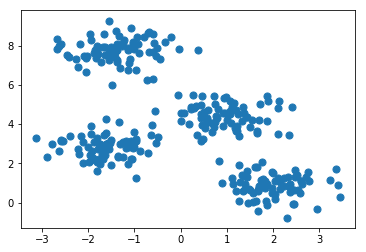

In [50]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [56]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [54]:
X[:, 0].shape

(300,)

In [55]:
X[:, 1].shape

(300,)

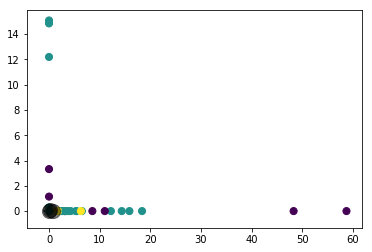

In [36]:
plt.scatter(vgg16_feature_list_np[:, 0], vgg16_feature_list_np[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [44]:
y_kmeans

array([2, 1, 1, ..., 2, 1, 1])

## KMeans VGG19 

In [54]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(predictions)
#y_kmeans = kmeans.predict()

ValueError: Found array with dim 4. Estimator expected <= 2.

In [18]:
cv2.kmeans(patches, 5)

TypeError: Required argument 'bestLabels' (pos 3) not found

In [57]:
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [58]:
# prepare the image for the VGG model
processed_image = vgg19.preprocess_input(patches)

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

In [62]:
vgg19_feature_list = []
for patch in patches:
    #img_data = image.img_to_array(img)
    img_data = np.expand_dims(patch, axis=0)
    img_data = vgg19.preprocess_input(img_data)

    vgg19_feature = vgg19_model.predict(img_data)
    vgg19_feature_np = np.array(vgg19_feature)
    vgg19_feature_list.append(vgg19_feature_np.flatten())

vgg19_feature_list_np = np.array(vgg19_feature_list)    

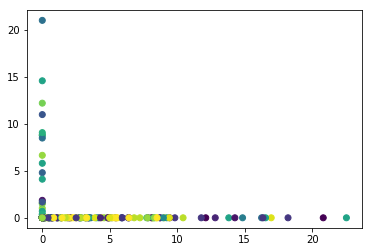

In [64]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(vgg19_feature_list_np)

y_kmeans = kmeans.predict(vgg19_feature_list_np)
plt.scatter(vgg19_feature_list_np[:, 0], vgg19_feature_list_np[:, 1], c=y_kmeans)#, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);